<a href="https://colab.research.google.com/github/a-singh03/DL-NLP/blob/main/035011_Ankita_Singh_DLNLP_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from  pathlib import Path

a. Call necessary libraries to build a NN model

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

b. Read california_housing_train.csv dataset

In [4]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [5]:
pathToFolder = "/content/sample_data"

In [6]:
path = Path(pathToFolder) / "california_housing_train.csv"

c. Explore the data using pandas

In [7]:
file = pd.read_csv(path)
file.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [8]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [9]:
file.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [25]:
file.isnull().sum().sum()

0

d. Split the data into X and y where X is a set					10%
	   of predictors and y is the target.Median_income has been chosen as target.

In [10]:
y = file.pop("median_income")
X = file

In [11]:
from sklearn.preprocessing import StandardScaler

Part e: Standardise dataset using StandardScaler()

In [12]:
ss = StandardScaler()
ss.fit(X)

StandardScaler()

In [13]:
X = ss.transform(X)

Part f: Split dataset into train/test dataset

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size = 0.25)

Part g:Build a Neural Network model to make prediction of target

In [35]:
model = tf.keras.Sequential()

In [36]:
model.add(layers.Input( shape = (8,) ) )

In [37]:
model.add(layers.Dense(100,activation='relu'))

In [38]:
model.add(layers.Dense(500,activation='relu'))

In [39]:
model.add(layers.Dense(700,activation='selu'))

In [40]:
model.add(layers.Dense(900,activation='selu'))

In [41]:
model.add(layers.Dense(1,activation='relu'))

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               900       
                                                                 
 dense_6 (Dense)             (None, 500)               50500     
                                                                 
 dense_7 (Dense)             (None, 700)               350700    
                                                                 
 dense_8 (Dense)             (None, 900)               630900    
                                                                 
 dense_9 (Dense)             (None, 1)                 901       
                                                                 
Total params: 1,033,901
Trainable params: 1,033,901
Non-trainable params: 0
_________________________________________________________________


In [43]:
from tensorflow.keras.utils import plot_model

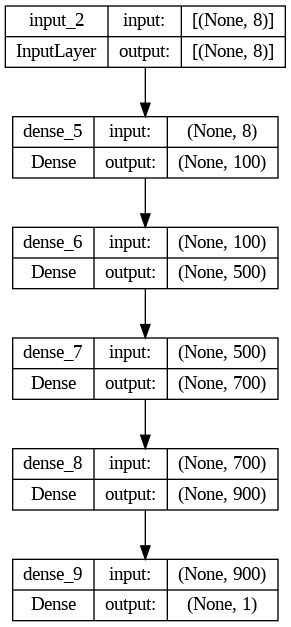

In [44]:
plot_model(model, show_shapes=True)

In [45]:
model.compile( loss = "mae")

h. fit the model

In [46]:
model.fit(X_train,y_train, epochs = 200)

Epoch 1/200
399/399 [==============================] - 5s 12ms/step - loss: 3.8900
Epoch 2/200
399/399 [==============================] - 4s 10ms/step - loss: 3.8804
Epoch 3/200
399/399 [==============================] - 4s 10ms/step - loss: 3.8804
Epoch 4/200
399/399 [==============================] - 5s 13ms/step - loss: 3.8804
Epoch 5/200
399/399 [==============================] - 4s 10ms/step - loss: 3.8804
Epoch 6/200
399/399 [==============================] - 4s 10ms/step - loss: 3.8804
Epoch 7/200
399/399 [==============================] - 5s 12ms/step - loss: 3.8804
Epoch 8/200
399/399 [==============================] - 4s 10ms/step - loss: 3.8804
Epoch 9/200
399/399 [==============================] - 4s 10ms/step - loss: 3.8804
Epoch 10/200
399/399 [==============================] - 5s 13ms/step - loss: 3.8804
Epoch 11/200
399/399 [==============================] - 4s 10ms/step - loss: 3.8804
Epoch 12/200
399/399 [==============================] - 4s 11ms/step - loss: 3.8804
E

i. Make predictions of test data using the model

In [52]:
pred = model.predict(X_test)

133/133 [==============================] - 0s 3ms/step


In [53]:
pred = np.round(pred)

In [54]:
pred = pred.flatten()

In [55]:
(pred == y_test).sum()/len(y_test)

0.0

In [56]:
model.evaluate(X_test,y_test)

133/133 [==============================] - 1s 3ms/step - loss: 3.8932


3.8931801319122314